In [1]:
import datetime
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [2]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


In [4]:
# Add a new axis
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In [5]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [6]:
# Convert class vectors to binary class matrices.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train.shape

(60000, 10)

In [8]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
y_test.shape

(10000, 10)

In [10]:
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
input_shape = x_train[0].shape

In [12]:
input_shape

(28, 28, 1)

In [13]:

model = keras.models.Sequential([

  keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),

  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),

  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  keras.layers.Conv2D(120,kernel_size=(5, 5), strides = (1,1), activation = 'tanh', padding='valid'),

  keras.layers.Flatten(),

  keras.layers.Dense(120, activation='tanh'),

  keras.layers.Dense(84, activation='tanh'),

  keras.layers.Dense(num_classes, activation='softmax')
  
])



In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



1.   156 = (5 * 5 * 6) + 6 
2.   2416 = (6 * 5 * 5 * 16) + 16 
3.   48120 = (16 * 5 * 5 * 120) + 120
4.   14520 = (120 * 120) + 120
5.   10164 = (120 * 84) + 84
6.   850 = (84 * 10) + 10
 







In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [16]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
y_train.shape

(60000, 10)

1875 = 60000/32

In [18]:
history = model.fit(x_train, y=y_train, 
          epochs=20, 
          batch_size = 32,
          validation_data=(x_test, y_test) )

Epoch 1/20
1875/1875 [==============================] - 17s 4ms/step - loss: 0.8284 - accuracy: 0.7118 - val_loss: 0.6057 - val_accuracy: 0.7798
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5260 - accuracy: 0.8113 - val_loss: 0.5078 - val_accuracy: 0.8183
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4614 - accuracy: 0.8335 - val_loss: 0.4773 - val_accuracy: 0.8255
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4276 - accuracy: 0.8455 - val_loss: 0.4400 - val_accuracy: 0.8417
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4039 - accuracy: 0.8535 - val_loss: 0.4200 - val_accuracy: 0.8509
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3851 - accuracy: 0.8611 - val_loss: 0.4063 - val_accuracy: 0.8560
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3699 - accuracy: 0.8660 - val_loss: 0.4037 - val_accuracy

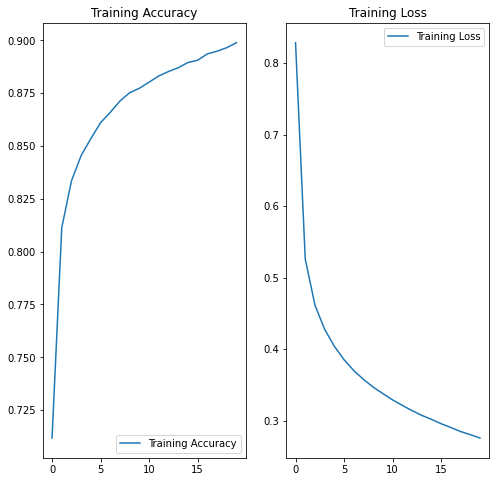

In [19]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [20]:
test_score = model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.3161 - accuracy: 0.8855


In [21]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 0.3161, accuracy 88.55%
